# **Import all the needed library**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning models and utilities
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

 # **Import the data from csv file**

In [ ]:
#Read csv file
book_data_cleaned = pd.read_csv("book_data_cleaned.csv")
book_data_cleaned.info()
book_data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129462 entries, 0 to 129461
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               129462 non-null  object 
 1   title              129462 non-null  object 
 2   author             129462 non-null  object 
 3   stars              129462 non-null  float64
 4   price              129462 non-null  float64
 5   isKindleUnlimited  129462 non-null  bool   
 6   category_id        129462 non-null  int64  
 7   isBestSeller       129462 non-null  bool   
 8   isEditorsPick      129462 non-null  bool   
 9   isGoodReadsChoice  129462 non-null  bool   
 10  category_name      129462 non-null  object 
dtypes: bool(4), float64(2), int64(1), object(4)
memory usage: 7.4+ MB


,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,4.8,9.99,False,6,True,False,False,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,4.4,16.99,False,6,False,False,False,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,4.8,16.99,False,6,False,True,False,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,4.2,9.95,True,6,False,True,False,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,4.7,13.99,False,6,False,False,False,Parenting & Relationships


# **Create "top_author" column**

- As we stated above, there are a huge amount of authors in the dataset. To make analysis easier, we will group the authors into two group: `Top author` and `Other author`.
- Top authors are 70 highest rated authors, with the constraint of writting more than or equal to 30 books.
- We will find the list of top authors then create a new column name "top_author", which depends on whether the author of the book is listed as top author.

## **I. Make a copy of cleaned_book_data DataFrame**
We will start by making a copy of our cleaned DataFrame

In [ ]:
#Make a copy of book_data_cleaned DataFrame
book_data_cleaned_copy = book_data_cleaned.copy()

book_data_cleaned_copy['no_of_books_written'] = book_data_cleaned_copy.groupby('author')['title'].transform('count')
book_data_cleaned_copy.info()
book_data_cleaned_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129462 entries, 0 to 129461
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   asin                 129462 non-null  object 
 1   title                129462 non-null  object 
 2   author               129462 non-null  object 
 3   stars                129462 non-null  float64
 4   price                129462 non-null  float64
 5   isKindleUnlimited    129462 non-null  bool   
 6   category_id          129462 non-null  int64  
 7   isBestSeller         129462 non-null  bool   
 8   isEditorsPick        129462 non-null  bool   
 9   isGoodReadsChoice    129462 non-null  bool   
 10  category_name        129462 non-null  object 
 11  no_of_books_written  129462 non-null  int64  
dtypes: bool(4), float64(2), int64(2), object(4)
memory usage: 8.4+ MB


,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name,no_of_books_written
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,4.8,9.99,False,6,True,False,False,Parenting & Relationships,4
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,4.4,16.99,False,6,False,False,False,Parenting & Relationships,4
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,4.8,16.99,False,6,False,True,False,Parenting & Relationships,2
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,4.2,9.95,True,6,False,True,False,Parenting & Relationships,3
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,4.7,13.99,False,6,False,False,False,Parenting & Relationships,5


## **II. Create new DataFrame of authors (>= 30 books)**
Now, we will create a new DataFrame contains only authors with at least 30 books

In [ ]:
#Extract only books written by authors with more than 30 books
book_data_top_author = book_data_cleaned_copy[book_data_cleaned_copy['no_of_books_written'] >= 30]

#Calculate the number of author with more than 30 books
unique_top_author = book_data_top_author['author'].nunique()
print('Number of unique top authors: ', unique_top_author, "\n")

book_data_top_author.info()
book_data_top_author.head()

Number of unique top authors:  135 

<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 29 to 129455
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 6680 non-null   object 
 1   title                6680 non-null   object 
 2   author               6680 non-null   object 
 3   stars                6680 non-null   float64
 4   price                6680 non-null   float64
 5   isKindleUnlimited    6680 non-null   bool   
 6   category_id          6680 non-null   int64  
 7   isBestSeller         6680 non-null   bool   
 8   isEditorsPick        6680 non-null   bool   
 9   isGoodReadsChoice    6680 non-null   bool   
 10  category_name        6680 non-null   object 
 11  no_of_books_written  6680 non-null   int64  
dtypes: bool(4), float64(2), int64(2), object(4)
memory usage: 495.8+ KB


,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name,no_of_books_written
29,B000UZJREU,Duma Key: A Novel,Stephen King,4.5,9.99,False,6,False,True,False,Parenting & Relationships,99
32,B09RX42621,It Starts with Us: the highly anticipated sequ...,Colleen Hoover,4.5,0.00,False,6,False,True,False,Parenting & Relationships,56
33,B017RNBS3A,It Ends With Us: The emotional #1 Sunday Times...,Colleen Hoover,4.7,0.00,False,6,False,False,True,Parenting & Relationships,56
52,B0BVPXLGCD,"Unsafe: Damian longs for home, but one man sta...",Cathy Glass,4.7,2.99,False,6,False,False,False,Parenting & Relationships,37
159,B0CCSTPMH2,The Nosey Neighbor: The Ozarks Cozy Mystery Se...,Dianne Harman,4.6,4.99,True,6,True,False,False,Parenting & Relationships,86


## **II. Rank the authors**
After that, we will calculate the average ranking for 135 authors who written at least 30 books and rank them in descending order.

In [ ]:
#Calculate the mean rating for each author and rank them in descending order
top_author_data = book_data_top_author.groupby('author')['stars'].mean().sort_values(ascending=False)
top_author_data = top_author_data.reset_index()
top_author_data.info()
top_author_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   author  135 non-null    object 
 1   stars   135 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


,author,stars
0,Eiichiro Oda,4.833333
1,Pixel Ate,4.816667
2,Steve the Noob,4.805556
3,Joyce Meyer,4.805556
4,Dave Villager,4.793333


## **III. Create a list of top 70 authors**
We will make a list of names of **70** highest ranked authors. We chose 70 authors because originally, we have 72096 unique authors, so our top authors would be roughly top 0.1% authors.

In [ ]:
#Extract top 70 highest rated author (who wrote more than 30 books)
top70_author_data = top_author_data.head(70)
top70_author_data.info()
top70_author_data.head()

#Create a list with names of top 70 authors
top70_author = top70_author_data['author'].tolist()
print(top70_author)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   author  70 non-null     object 
 1   stars   70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
['Eiichiro Oda', 'Pixel Ate', 'Steve the Noob', 'Joyce Meyer', 'Dave Villager', 'Nancy Faber', 'Max Lucado', 'Erin Hunter', 'John F. MacArthur', 'Timothy Keller', 'P. C. Cast', 'J.K. Rowling', 'John C. Maxwell', 'Rick Riordan', 'Tamora Pierce', 'Ilona Andrews', 'Thich Nhat Hanh', 'Christine Feehan', 'J. D. Robb', 'C. S. Lewis', 'J.R. Ward', 'Sarah J. Maas', 'Karen Kingsbury', 'Jim Butcher', 'Gary Chapman', 'Cathy Glass', 'Amanda M. Lee', 'Lindsay Buroker', 'Brandon Sanderson', 'Robert Jordan', 'DK', 'Jim Davis', 'Michael Anderle', 'Brian Tracy', "Tricia O'Malley", "Bathroom Readers' Institute", 'Laurell K. Hamilton', 'Liz Isaacson', 'Deborah Brown', 'Terry Pratchett', 'Jessie Gussman', 'Me

## **IV. Create new DataFrame with only top authors**
We will create a DataFrame with books written by our top 70 authors.

In [ ]:
#Extract books written by top 70 authors
book_data_top70_author = book_data_top_author[book_data_top_author['author'].isin(top70_author)]
book_data_top70_author.info()
book_data_top70_author.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3283 entries, 52 to 129433
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 3283 non-null   object 
 1   title                3283 non-null   object 
 2   author               3283 non-null   object 
 3   stars                3283 non-null   float64
 4   price                3283 non-null   float64
 5   isKindleUnlimited    3283 non-null   bool   
 6   category_id          3283 non-null   int64  
 7   isBestSeller         3283 non-null   bool   
 8   isEditorsPick        3283 non-null   bool   
 9   isGoodReadsChoice    3283 non-null   bool   
 10  category_name        3283 non-null   object 
 11  no_of_books_written  3283 non-null   int64  
dtypes: bool(4), float64(2), int64(2), object(4)
memory usage: 243.7+ KB


,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name,no_of_books_written
52,B0BVPXLGCD,"Unsafe: Damian longs for home, but one man sta...",Cathy Glass,4.7,2.99,False,6,False,False,False,Parenting & Relationships,37
199,B07C8BPCKT,Los 5 lenguajes del amor (Spanish Edition),Gary Chapman,4.8,4.99,False,6,False,False,False,Parenting & Relationships,30
253,B007WOC4FG,Another Forgotten Child,Cathy Glass,4.6,11.99,False,6,False,False,False,Parenting & Relationships,37
312,B01BXPWGX4,The 5 Love Languages of Children: The Secret t...,Gary Chapman,4.8,6.70,False,6,False,False,False,Parenting & Relationships,30
335,B08P8W2PH9,The Heart of Devin Mackade (MacKade Brothers B...,Nora Roberts,4.5,9.99,False,6,False,False,False,Parenting & Relationships,99


## **V. Top 70 authors rating**
From the new DataFrame, we can calculate the mean rating for each author and plot the ratings in a bar plot.

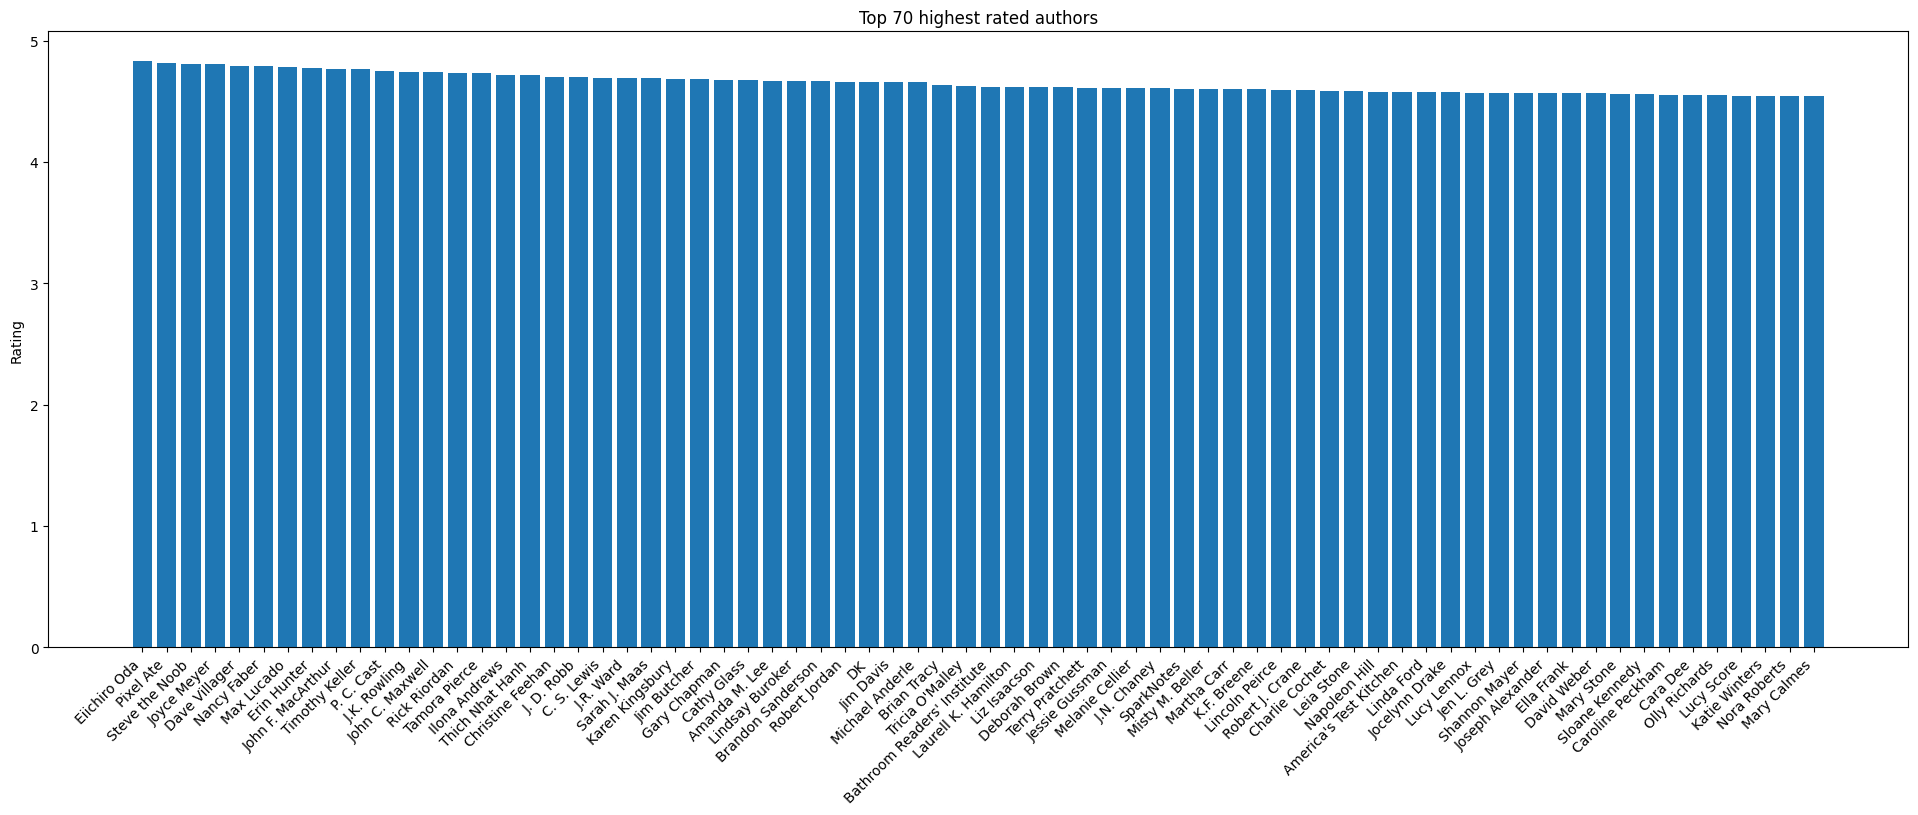

In [ ]:
#Plot mean rating of top 70 authors
plt.figure(figsize=(24,8))
ax = plt.bar(top70_author_data['author'], top70_author_data['stars'])
plt.ylabel('Rating')
plt.title('Top 70 highest rated authors')
plt.xticks(rotation=45, ha='right', fontsize = 10)  # Rotate x-axis labels for readability
plt.show()

**1. Ratings Overview**:
   - All authors have ratings very close to 5, indicating exceptional reader satisfaction.
   - The top-rated authors represent a diverse array of genres, showcasing their broad appeal.

**2. Chart Highlights**:
   - Authors like **Eiichiro Oda** and **Pixel Ate** stand out with their consistently high ratings, solidifying their reputation among readers.
   - Several other authors maintain high ratings with minimal variability, reflecting uniform admiration from their audience.

**3. Category Representation**:
   - The chart features authors from varying genres, emphasizing the widespread quality across different types of literature and writing styles.

## **VI. Stacked bar plot between isBestSeller and top 70 authors**
We also plot the stacked bar plot to see authors with high percentage of best seller books.

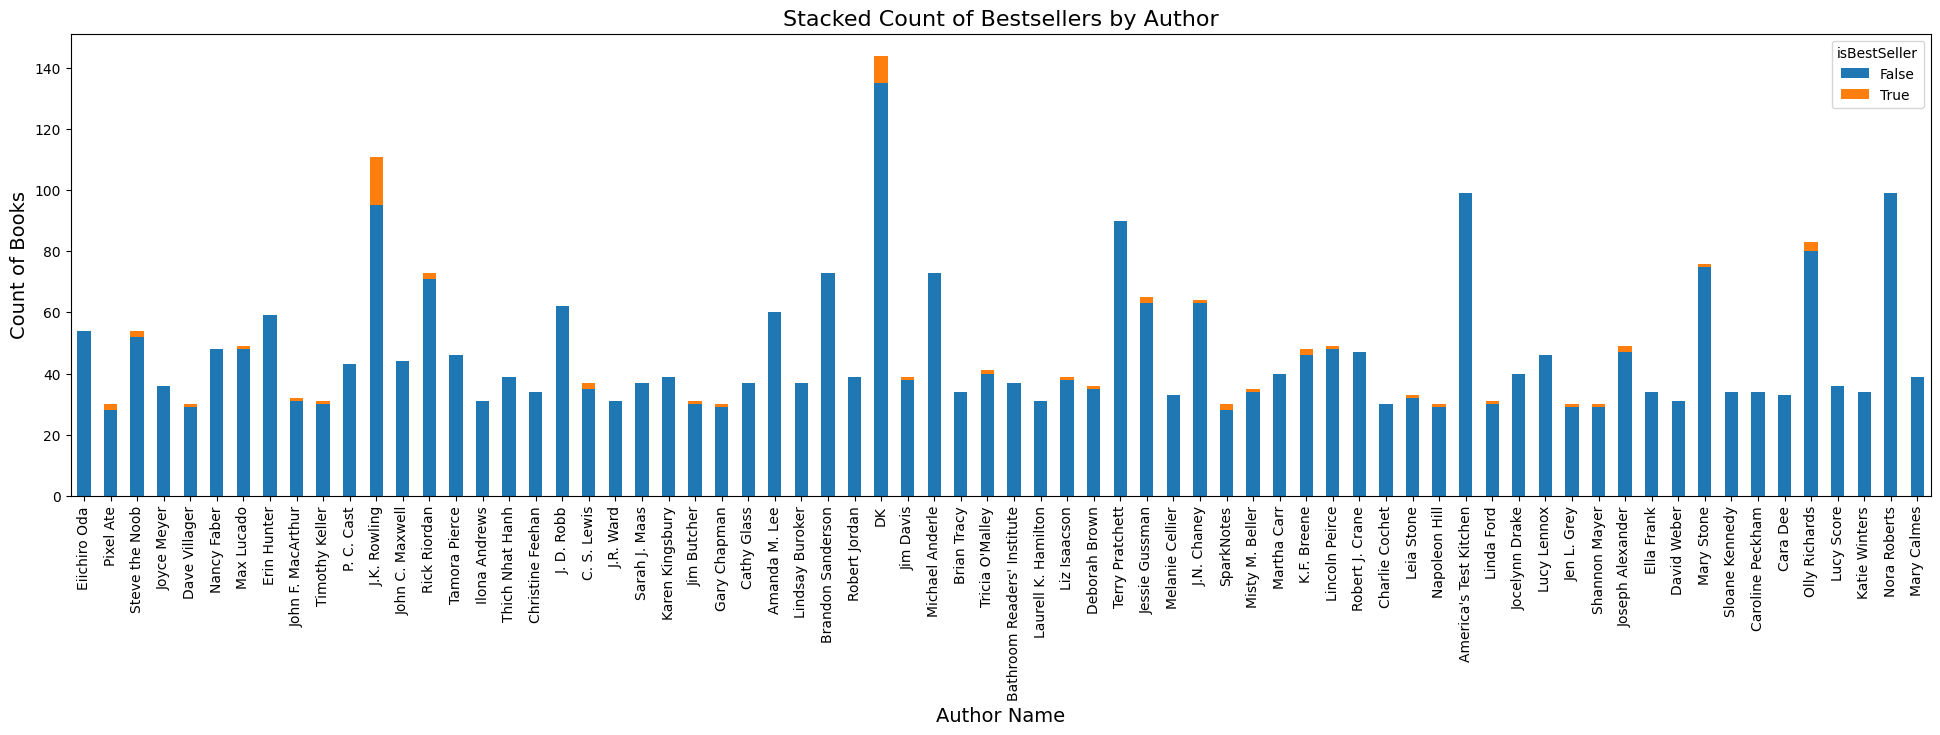

In [ ]:
#Plot stacked bar between isBestSeller and top 70 authors
pivot = book_data_top70_author.groupby(['author', 'isBestSeller']).size().unstack(fill_value=0)

author_order = book_data_cleaned['author'].value_counts().index
ordered_authors = [author for author in top70_author if author in pivot.index]

pivot = pivot.loc[ordered_authors]
pivot.plot(kind='bar', stacked=True, figsize=(24, 6), color = ['tab:blue', 'tab:orange']);

plt.xlabel('Author Name', fontsize=14)
plt.ylabel('Count of Books', fontsize=14)
plt.xticks(rotation=90)
plt.title('Stacked Count of Bestsellers by Author', fontsize=16)
plt.show()

**Observation:**
- **DK** tops the chart with around **145 books**, but only a small portion are bestsellers. They seem to focus on volume more than bestseller hits.
- **J.K. Rowling** is both **prolific** and **successful**, with a big portion of her ~110 books being bestsellers — clearly a standout.
- **Olly Richards** and **Rick Riordan** also have strong numbers in both total books and bestseller count, placing them among the top-performing authors.
- Most authors have **fewer than 50 books**, and the majority have **no bestsellers**, which shows that bestseller status is pretty rare.
- The orange bars (bestsellers) are small across the board — even authors with a ton of books usually have just a **few bestsellers**.

## **VII. Create a new column "top_author" in the cleaned data frame**
The last step is to create a new column **"top_author"** in our **book_data_cleaned** DataFrame.
- If the author of the book is in top 70 author, then "top_author" will be `True`.
- Otherwise, it would be `False`.

In [ ]:
#Create a new column 'top_author' in the book_data_cleaned DataFrame
book_data_cleaned['top_author'] = book_data_cleaned['author'].apply(lambda x: True if x in top70_author else False)
book_data_cleaned.info()
book_data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129462 entries, 0 to 129461
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               129462 non-null  object 
 1   title              129462 non-null  object 
 2   author             129462 non-null  object 
 3   stars              129462 non-null  float64
 4   price              129462 non-null  float64
 5   isKindleUnlimited  129462 non-null  bool   
 6   category_id        129462 non-null  int64  
 7   isBestSeller       129462 non-null  bool   
 8   isEditorsPick      129462 non-null  bool   
 9   isGoodReadsChoice  129462 non-null  bool   
 10  category_name      129462 non-null  object 
 11  top_author         129462 non-null  bool   
dtypes: bool(5), float64(2), int64(1), object(4)
memory usage: 7.5+ MB


,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name,top_author
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,4.8,9.99,False,6,True,False,False,Parenting & Relationships,False
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,4.4,16.99,False,6,False,False,False,Parenting & Relationships,False
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,4.8,16.99,False,6,False,True,False,Parenting & Relationships,False
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,4.2,9.95,True,6,False,True,False,Parenting & Relationships,False
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,4.7,13.99,False,6,False,False,False,Parenting & Relationships,False


---

# **Create Term Frequency–Inverse Document Frequency (TF-IDF) vector for book titles**
- Term Frequency: How often a term appears in a title.

$$
\text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in } d}
$$

\

- Inverse Document Frequency: How rare a term in all titles.

$$
\text{IDF}(t) = \log\left( \frac{N}{1 + \text{df}(t)} \right)
$$

Where:

>t = the term \
>N = total number of documents \
>$\text{df}$(t)= number of documents containing the term t\
>1 is added to the denominator to avoid division by zero

\

- The TF-IDF score is the product of Term Frequency and Inverse Document Frequency:

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$

## **I. Calculate TF-IDF for all titles and create a new DataFrame**

We will calculate the TF-IDF for all titles, giving top 2000 words excluding common words in English such as **"a", "the", "and"**.

In [ ]:
#Calculate TF-IDF for all the titles
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)

title_tfidf_matrix = vectorizer.fit_transform(book_data_cleaned['title'])

title_tfidf_df = pd.DataFrame(title_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
title_tfidf_df['isBestSeller'] = book_data_cleaned['isBestSeller']

## **II. Mean TF-IDF scores for each word**
Then, we will calculate the average TF-IDF score for each words, rank them in descending order and plot a bar graph displaying top 20 words with highest scores.

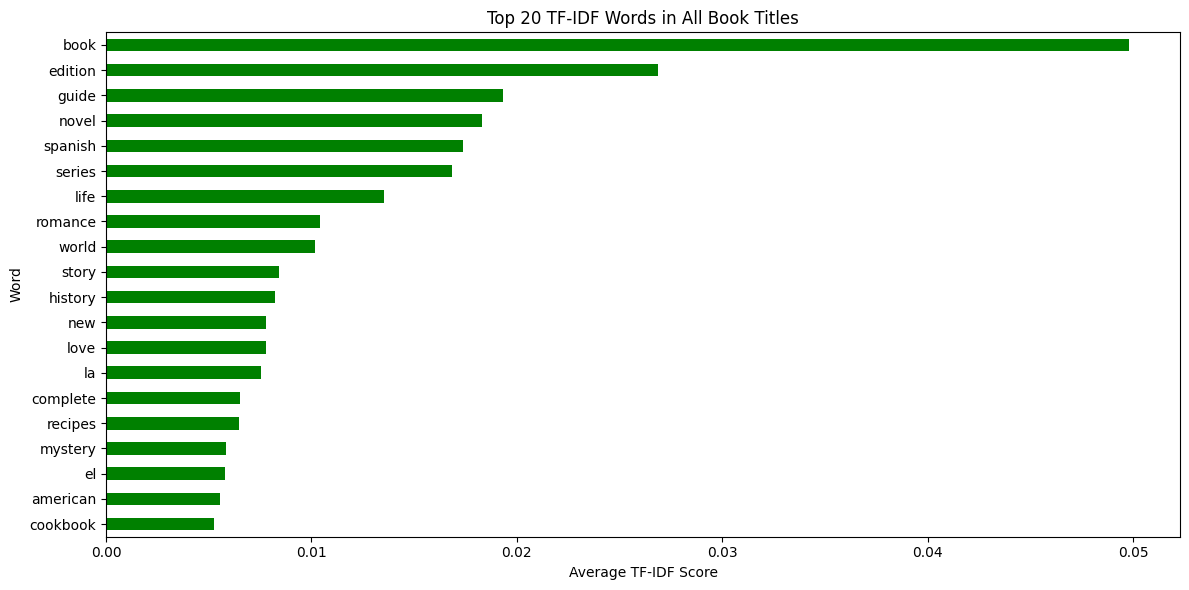

In [ ]:
# Calculate mean TF-IDF scores across all books
top_words = title_tfidf_df.drop(columns='isBestSeller').mean().sort_values(ascending=False).head(20)

# Plot top 20 words overall
plt.figure(figsize=(12, 6))
top_words.plot(kind='barh', color = "green")
plt.gca().invert_yaxis()
plt.title("Top 20 TF-IDF Words in All Book Titles")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

**1. Highest Scoring Words**:
   - "book" has the top TF-IDF score, emphasizing its significance and frequent appearance in book titles.
   - Other high-ranking words like "edition," "guide," and "novel" reflect common themes related to learning, storytelling, and categorization.

**2. Genre-Specific Words**:
   - Words like "romance," "mystery," and "recipes" highlight genre-specific interests that resonate with readers.
   - The inclusion of "spanish," "la," and "el" suggests a notable presence of Spanish-language books in the dataset.

**3. Diversity of Topics**:
   - Titles span a variety of themes—educational ("guide," "world"), cultural ("history," "american"), and personal ("life," "love").
   - This diversity demonstrates the wide range of literary interests among readers.

## **III. Mean TF-IDF score for each words in bestseller books and non bestseller books**
We will calculate the mean TF-IDF score for each word seperately for non bestseller books and bestseller books. Then we will rank them respectively.

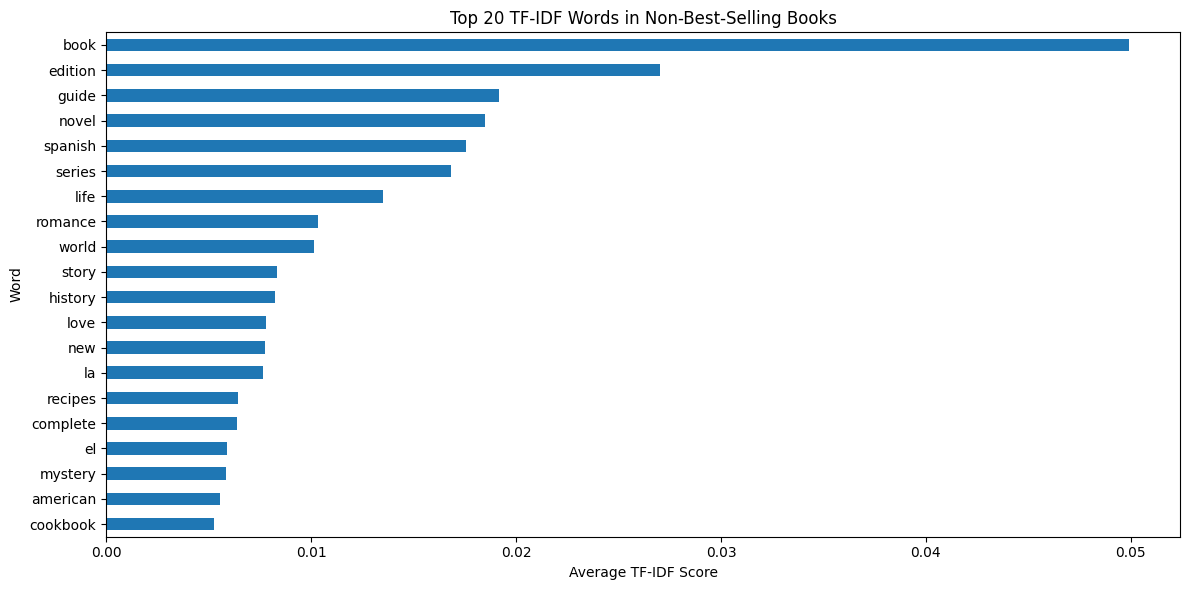

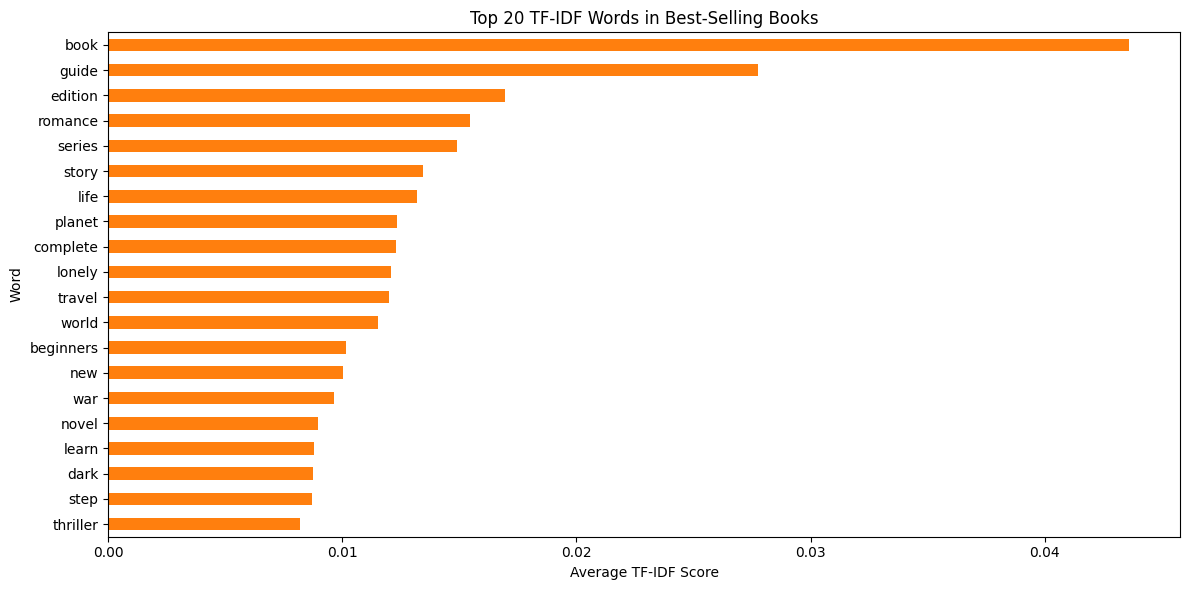

In [ ]:
#Seperate bestseller and non bestseller titles, take top 20
top_words_bestseller = title_tfidf_df[title_tfidf_df['isBestSeller'] == True].drop(columns='isBestSeller').mean().sort_values(ascending=False).head(20)
top_words_non_bestseller = title_tfidf_df[title_tfidf_df['isBestSeller'] == False].drop(columns='isBestSeller').mean().sort_values(ascending=False).head(20)

#Plot top 20 words in non bestseller titles
plt.figure(figsize=(12, 6))
top_words_non_bestseller.plot(kind='barh', color = 'tab:blue')
plt.gca().invert_yaxis()
plt.title("Top 20 TF-IDF Words in Non-Best-Selling Books")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

#Plot top 20 words in bestseller titles
plt.figure(figsize=(12, 6))
top_words_bestseller.plot(kind='barh', color = 'tab:orange')
plt.gca().invert_yaxis()
plt.title("Top 20 TF-IDF Words in Best-Selling Books")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

**Observation:**\
This chart compares the top 20 TF-IDF words found in the titles or descriptions of **non-bestselling** books (top plot, blue) and **bestselling** books (bottom plot, orange).


- **TF-IDF (Term Frequency–Inverse Document Frequency)** helps highlight words that are important in a set of documents by balancing how common a word is with how unique it is.
- Words with higher scores are more distinctive within that group of books.


- Common top words in both groups include: `book`, `novel`, `guide`, `series`, and `life` — suggesting these are central themes across all books.
- **Non-bestselling books** often include niche or specific terms like:
  - `edition`, `spanish`, `cookbook`, `recipes`, and `american`
  - Suggesting a focus on **practical or regional topics**
- **Bestselling books** use slightly more emotionally engaging or broader themes like:
  - `romance`, `war`, `adventure`, `home`, `power`
  - These might appeal more to mass audiences due to storytelling or universal relevance

## **IV. Differences between TF-IDF score for bestseller books and non best seller books' title**

Last but not least, we will calculate the difference between the mean TF-IDF score for each word in bestseller books and non bestseller books and plot a graph with top 20 differences.



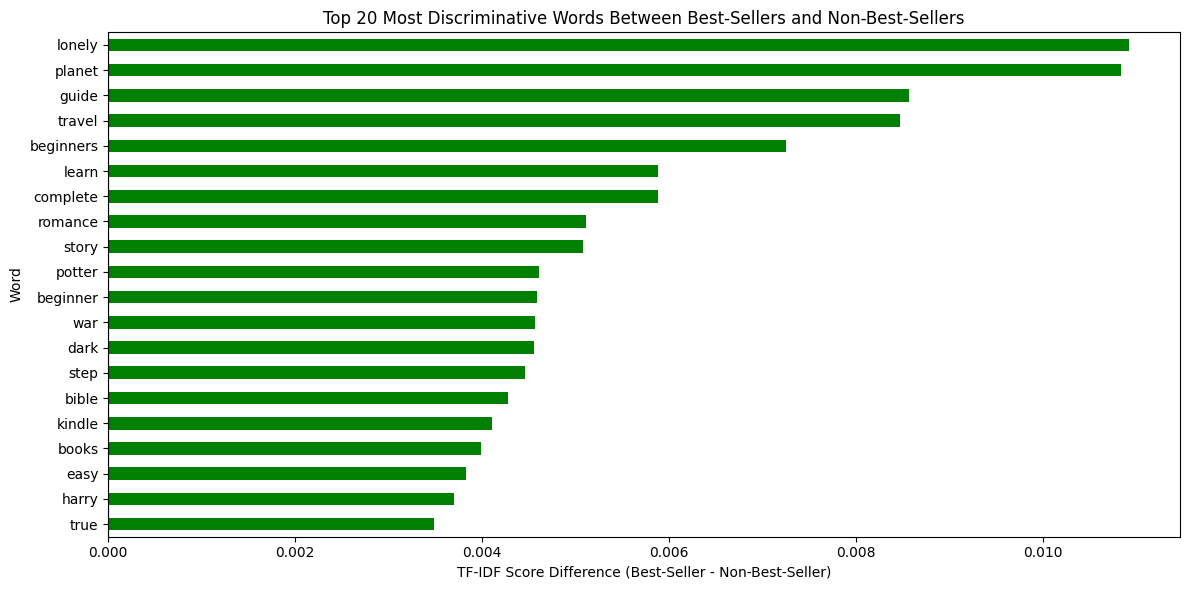

In [ ]:
#Seperate TF-IDF score for best seller and non best seller titles
all_words_bestseller = title_tfidf_df[title_tfidf_df['isBestSeller'] == True].drop(columns='isBestSeller').mean()
all_words_non_bestseller = title_tfidf_df[title_tfidf_df['isBestSeller'] == False].drop(columns='isBestSeller').mean()

#Compute the difference (best-seller - non-best-seller)
diff_words = all_words_bestseller - all_words_non_bestseller
diff_words_sorted = diff_words.sort_values(ascending=False)
top_diff_words = diff_words.loc[diff_words_sorted.index[:20]]

plt.figure(figsize=(12, 6))
top_diff_words.sort_values().plot(kind='barh', color=top_diff_words.apply(lambda x: 'green' if x > 0 else 'gray'))
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Top 20 Most Discriminative Words Between Best-Sellers and Non-Best-Sellers")
plt.xlabel("TF-IDF Score Difference (Best-Seller - Non-Best-Seller)")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

1. **Most Prominent Words**:
   - **"Novel"** has the highest TF-IDF score difference, making it the most indicative word for distinguishing best-sellers from non-bestsellers.
   - Other notable words include **"story," "adventure," "new," and "psychology"**, which reflect themes commonly associated with best-sellers.

2. **Genre and Themes**:
   - Words like **"war," "magic," "science," and "chronicles"** suggest a strong inclination towards adventure, fantasy, and intellectual topics in best-sellers.
   - Terms such as **"home" and "travel"** point to genres that resonate emotionally or inspire exploration.

3. **Cultural and Historical Relevance**:
   - Words like **"christian," "classics," and "prince"** highlight the importance of historical, cultural, and faith-based themes in shaping best-seller status.


---

# **One Hot Encoding for genres**

## **I. One Hot Encoding**
We will use `pd.get_dummies` to one hot encode "category_name" variable.

In [ ]:
#One Hot Encoding for genres
book_data_encoded = pd.get_dummies(book_data_cleaned, columns= ['category_name'])
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)
shape = book_data_encoded.shape
print('DataFrame dimension: ', shape)
book_data_encoded.info()
book_data_encoded.head()

DataFrame dimension:  (129462, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129462 entries, 0 to 129461
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   asin                                        129462 non-null  object 
 1   title                                       129462 non-null  object 
 2   author                                      129462 non-null  object 
 3   stars                                       129462 non-null  float64
 4   price                                       129462 non-null  float64
 5   isKindleUnlimited                           129462 non-null  bool   
 6   category_id                                 129462 non-null  int64  
 7   isBestSeller                                129462 non-null  bool   
 8   isEditorsPick                               129462 non-null  bool   
 9   isGoodReadsChoice                  

,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,top_author,category_name_Arts & Photo graphy,category_name_Biographies & Memoirs,category_name_Business & Money,category_name_Children's eBooks,category_name_Comics,category_name_Computers & Technology,"category_name_Cookbooks, Food & Wine","category_name_Crafts, Hobbies & Home",category_name_Education & Teaching,category_name_Engineering & Transportation,category_name_Foreign Language,"category_name_Health, Fitness & Dieting",category_name_History,category_name_Humor & Entertainment,category_name_LGBTQ+ eBooks,category_name_Law,category_name_Literature & Fiction,category_name_Medical,"category_name_Mystery, Thriller & Suspense",category_name_Nonfiction,category_name_Parenting & Relationships,category_name_Politics & Social Sciences,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,4.8,9.99,False,6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,4.4,16.99,False,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,4.8,16.99,False,6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,4.2,9.95,True,6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,4.7,13.99,False,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## **II. Drop 1 Column**
To avoid multicollinearity, we should drop 1 of genre columns.

In [ ]:
#Drop 1 genre column
book_data_encoded = book_data_encoded.drop(columns= 'category_name_Arts & Photo graphy')
shape = book_data_encoded.shape
print('DataFrame dimension: ', shape)
book_data_encoded.info()
book_data_encoded.head()

DataFrame dimension:  (129462, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129462 entries, 0 to 129461
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   asin                                        129462 non-null  object 
 1   title                                       129462 non-null  object 
 2   author                                      129462 non-null  object 
 3   stars                                       129462 non-null  float64
 4   price                                       129462 non-null  float64
 5   isKindleUnlimited                           129462 non-null  bool   
 6   category_id                                 129462 non-null  int64  
 7   isBestSeller                                129462 non-null  bool   
 8   isEditorsPick                               129462 non-null  bool   
 9   isGoodReadsChoice                  

,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,top_author,category_name_Biographies & Memoirs,category_name_Business & Money,category_name_Children's eBooks,category_name_Comics,category_name_Computers & Technology,"category_name_Cookbooks, Food & Wine","category_name_Crafts, Hobbies & Home",category_name_Education & Teaching,category_name_Engineering & Transportation,category_name_Foreign Language,"category_name_Health, Fitness & Dieting",category_name_History,category_name_Humor & Entertainment,category_name_LGBTQ+ eBooks,category_name_Law,category_name_Literature & Fiction,category_name_Medical,"category_name_Mystery, Thriller & Suspense",category_name_Nonfiction,category_name_Parenting & Relationships,category_name_Politics & Social Sciences,category_name_Reference,category_name_Religion & Spirituality,category_name_Romance,category_name_Science & Math,category_name_Science Fiction & Fantasy,category_name_Self-Help,category_name_Sports & Outdoors,category_name_Teen & Young Adult,category_name_Travel
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,4.8,9.99,False,6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,4.4,16.99,False,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,4.8,16.99,False,6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,4.2,9.95,True,6,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,4.7,13.99,False,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## **III. Save the encoded DataFrame**
After egineering the features, we can now save the book_data_encoded DataFrame into a new csv file.

In [ ]:
book_data_encoded.to_csv('book_data_encoded.csv', index=False)